# Zadanie 1. PageRank z Taxation
Stwórz graf o 100 węzłach oraz losowo krawędzie pomiędzy węzłami. Utwórz krawędzie tak, aby na węzeł przypadało średnio ok. 10 krawędzi.
Policz PageRank z Taxation (z teleportami) na tak stworzonym grafie.



In [1]:
#SPAM FARMA
import networkx as nx  
import matplotlib.pyplot as plt 
            
import numpy as np 
            
N = 100 # Liczba węzłów
            
#1
M = np.random.rand(10, 10)
M[M > 0.5] = 1
M[M <= 0.5] = 0
print(M)
            
G = nx.from_numpy_matrix(M)
# nx.draw(G)
# plt.show()            
            
#2
M = np.random.rand(N, N)
G = nx.from_numpy_matrix(M)
# nx.draw(G)
# plt.show()            
            
#3
M = np.random.randint(2, size=(N,N)) 
G = nx.from_numpy_matrix(M)
# nx.draw(G)
# plt.show()
            
#4
G = nx.fast_gnp_random_graph(N, 0.10)
# nx.draw(G)
# plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]]


In [2]:
N=100

In [3]:
G = nx.fast_gnp_random_graph(N, 0.1)

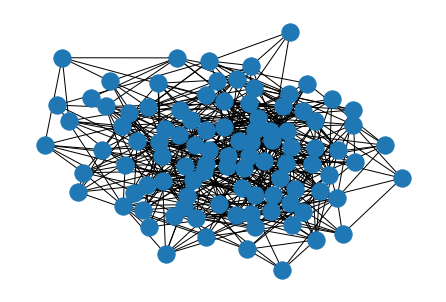

In [4]:
nx.draw(G)

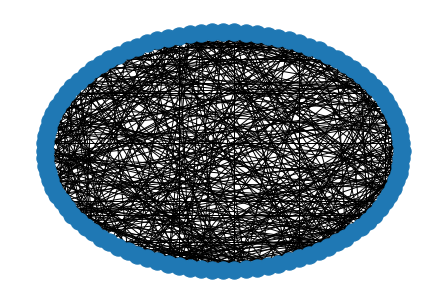

In [ ]:
nx.draw_circular(G)

# **SPOSÓB #2**

In [13]:
M = np.random.rand(N,N)

In [14]:
A = np.empty_like(M)

In [15]:
A[M > 0.5] = 1
A[M <= 0.5] = 0
print(A)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 1. 1.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


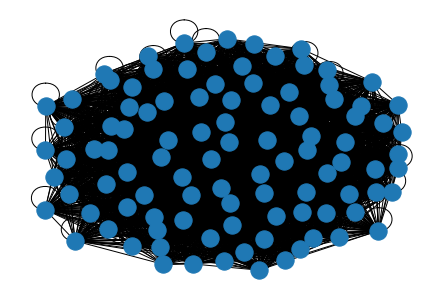

In [16]:
G1 = nx.from_numpy_array(A)
nx.draw(G1)

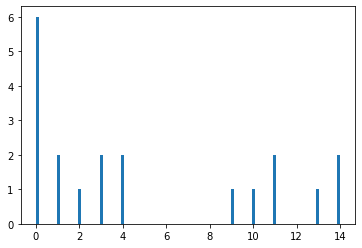

9.98


In [7]:
D = nx.degree_histogram(G)
print(zip(range(len(D)), D))
            
plt.hist(D, N)
plt.show()
            
# Średnia ilość węzłów
X = np.asanyarray(D) * np.arange(len(D))
print(np.sum(X)/float(len(G)))

# Zadanie 2. Spam Farm


In [17]:
import random

In [18]:
part_access = random.choices(list(G1.nodes()), k=10)

In [19]:
G2 = G1.copy()

In [20]:
for node in part_access:
  G2.add_edge(node, 101)

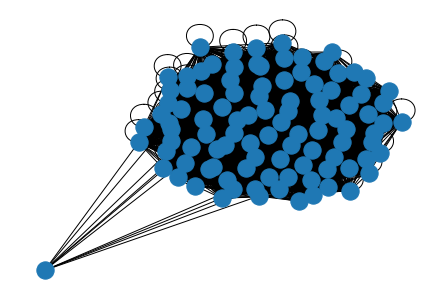

In [21]:
nx.draw(G2)

In [22]:
G3 = G2.copy()

In [23]:
for node in range(102,122):
  G3.add_edge(101,node)

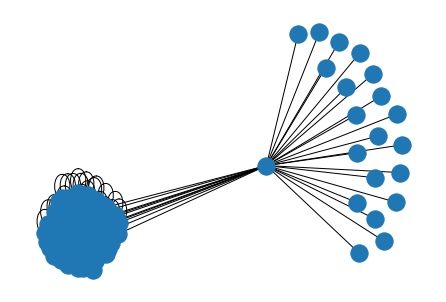

In [24]:
nx.draw(G3)

In [25]:
pr1 = nx.pagerank(G1, alpha=0.8)
pr2 = nx.pagerank(G2, alpha=0.8)
pr3 = nx.pagerank(G3, alpha=0.8)

In [26]:
max(pr1, key=lambda k: pr1[k]), max(pr2, key=lambda k: pr2[k]), max(pr3, key=lambda k: pr3[k])        

(72, 72, 101)

In [27]:
G4 = G3.copy()

In [28]:
for new_node in range(122,133):
  for node in random.choices(list(G.nodes()-part_access), k = 15):
    G4.add_edge(new_node, node)

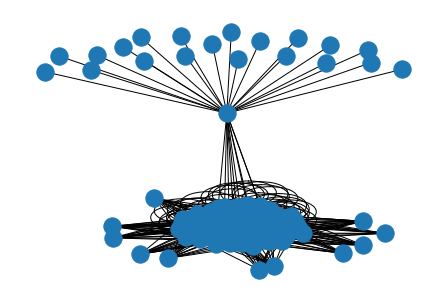

In [29]:
nx.draw(G4)

In [45]:
type(G4)

networkx.classes.graph.Graph

In [48]:
# macierz incydencji dla def page_rank
M4 = nx.to_numpy_array(G4)

In [43]:
def page_rank(M):
  # M- macierz grafu
  # tworzymy graf skierowany ze stworzonej wcześniej macierzy
  G = nx.DiGraph(M) 

  #Obliczamy pagerank za pomoca biblioteki, zwraca wartość dla węzłów
  V_networkx = nx.pagerank(G)
  print(V_networkx)

  #tworzymy z macierzy M stochastyczna macierz incydencji

  s = np.sum(M, axis = 0)

  #usunięcie ślepych zaułków
  s[s==0]=1

  M = (M/s)
  print(M)

  #tworzymy wektor stopni i ustawiamy na 1/N
  V = np.ones(M.shape[0])/M.shape[0]
  print(V)

  print('Taxation')
  Vold = V
  B = 0.8
  for i in range(1,50):
    Vnew = B * np.dot(M ,Vold) + (1-B) * np.ones(M.shape[0])/M.shape[0]
    print(Vold)
    Vold = Vnew


In [49]:
page_rank(M4)

{0: 0.008705171165957322, 1: 0.010624498045306529, 2: 0.007863072147459512, 3: 0.008985515103557107, 4: 0.010014507765614106, 5: 0.008349246386474662, 6: 0.008317078097020859, 7: 0.008937494716042943, 8: 0.00808293982475468, 9: 0.008788184691349026, 10: 0.008364201873972056, 11: 0.009315351471996886, 12: 0.00793098013671655, 13: 0.008472348435055024, 14: 0.008886584012717094, 15: 0.009081654252867596, 16: 0.008419922743655085, 17: 0.008732710895065759, 18: 0.008370735205620098, 19: 0.009224970928637447, 20: 0.00902685973690097, 21: 0.008991266986675642, 22: 0.007959435745234831, 23: 0.00867727772547546, 24: 0.008243067119542837, 25: 0.009083436002366682, 26: 0.00871231973223852, 27: 0.008873319799758297, 28: 0.008583747255830177, 29: 0.00883709113921421, 30: 0.00936513128389548, 31: 0.009024794541079706, 32: 0.00901183304350581, 33: 0.00846813502271541, 34: 0.008570562046709404, 35: 0.008508907352418034, 36: 0.008330548201494668, 37: 0.008658059691270262, 38: 0.00898881007789561, 39: 0